In [1]:
#Importing required libraries
import pandas as pd
import numpy as np 

import tensorflow as tf

from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading previously exported DataFrame
df = pd.read_csv('for_DNNRegressor.csv').set_index('Date')

#Dropping Events column and rows with null values
df = df.drop(['Events'], axis=1)
df.dropna(inplace= True)

In [3]:
df

,TempHighF,TempAvgF,TempLowF,HumidityAvgPercent,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,...,DewPointHighF_1,DewPointHighF_2,DewPointLowF_1,DewPointLowF_2,SeaLevelPressureHighInches_1,SeaLevelPressureHighInches_2,SeaLevelPressureLowInches_1,SeaLevelPressureLowInches_2,PrecipitationSumInches_1,PrecipitationSumInches_2
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-23,58,45,32,52.0,10.0,10.0,10.0,8.0,3.0,12.0,...,43.0,67.0,28.0,43.0,30.41,29.86,29.87,29.59,0.0,0.46
2013-12-24,61,46,31,56.0,10.0,10.0,7.0,12.0,4.0,20.0,...,31.0,43.0,23.0,28.0,30.56,30.41,30.41,29.87,0.0,0.00
2013-12-25,58,50,41,71.0,10.0,10.0,7.0,10.0,2.0,16.0,...,36.0,31.0,21.0,23.0,30.56,30.56,30.30,30.41,0.0,0.00
2013-12-26,57,48,39,63.0,10.0,9.0,7.0,12.0,3.0,17.0,...,44.0,36.0,36.0,21.0,30.41,30.56,30.27,30.30,0.0,0.00
2013-12-27,60,53,45,65.0,10.0,9.0,7.0,7.0,1.0,11.0,...,39.0,44.0,33.0,36.0,30.47,30.41,30.34,30.27,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-27,103,89,75,54.0,10.0,10.0,10.0,12.0,5.0,21.0,...,75.0,75.0,61.0,63.0,30.13,30.11,29.93,29.95,0.0,0.00
2017-07-28,105,91,76,54.0,10.0,10.0,10.0,14.0,5.0,20.0,...,71.0,75.0,61.0,61.0,30.04,30.13,29.88,29.93,0.0,0.00
2017-07-29,107,92,77,51.0,10.0,10.0,10.0,12.0,4.0,17.0,...,71.0,71.0,55.0,61.0,29.97,30.04,29.81,29.88,0.0,0.00


In [4]:
# Dropping the TempHighF and TempLowF from the DataFrame because they are not needed
df = df.drop(['TempLowF', 'TempHighF'], axis=1)

# X is a DataFrame of all columns except TempAvgF
X = df[[col for col in df.columns if col != 'TempAvgF']]

# y is a DataFrame of the TempAvgF
y = df['TempAvgF']

In [5]:
# split data into training set and a temporary set
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [6]:
# take the remaining 20% of data in X_tmp, y_tmp and splitting them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   1039, Training features   31
Validation instances 130, Validation features 31
Testing instances    130, Testing features    31


In [7]:
# Listing feature columns (all numeric columns in the DataFrame) for future use
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [8]:
# Instantiating DNNRegressor class, 
# specifying that I want a neural network which is two layers deep with 50 nodes each.
# Also, indicating that I want my model data stored in a directory called "tf_model".

regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
# Defining a function to feed data into neural network during training and testing later
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [10]:
# Clearing the session, i.e., removing all the nodes left over from previous models, 
# freeing memory and preventing slowdown in model training 
# (I had to add this because I ran the same code multiple times and each successive iteration took more time to train)
tf.keras.backend.clear_session()

In [11]:
df = df.reset_index(drop=True)

# Defining a training loop to train the model on the training data 
# and evaluating it periodically on the evaluation data and storing it in the evaluations array defined below
evaluations = []
# STEPS indicates the batching of training set per loop
# For STEPS = 400, training set will be batched 400 times per loop
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                                         steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.

INFO:tensorflow:global_step/sec: 91.9653
INFO:tensorflow:loss = 31.73516, step = 600 (1.087 sec)
INFO:tensorflow:global_step/sec: 101.302
INFO:tensorflow:loss = 30.06936, step = 700 (0.987 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 800...
INFO:tensorflow:Saving checkpoints for 800 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 800...
INFO:tensorflow:Loss for final step: 23.804903.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tenso

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-1200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1200...
INFO:tensorflow:Saving checkpoints for 1200 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1200...
INFO:tensorflow:loss = 27.30728, step = 1200
INFO:tensorflow:global_step/sec: 99.7317
INFO:tensorflow:loss = 27.440332, step = 1300 (1.003 sec)
INFO:tensorflow:global_step/sec: 112.759
INFO:tensorflow:loss = 28.532665, step = 1400 (0.887 sec)
INFO:tensorflow:global_step/sec: 108.929
INFO:tensorflow:loss = 27.305265, step = 1500 (0.918 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1600...
INFO:tensorflow:Saving checkpoints for 1600 into tf_model\model.ckpt.
INFO:tensorflow

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:48:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.30087s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:48:49
INFO:tensorflow:Saving dict for global step 2000: average_loss = 34.1185, global_step = 2000, label/mean = 68.44615, loss = 34.1185, prediction/mean = 68.94204
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: tf_model\model.ckpt-2000
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, p

INFO:tensorflow:Inference Time : 0.55478s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:49:05
INFO:tensorflow:Saving dict for global step 2800: average_loss = 32.445988, global_step = 2800, label/mean = 68.44615, loss = 32.445988, prediction/mean = 68.90539
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2800: tf_model\model.ckpt-2800
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:49:06Z
INFO:tensorflo

INFO:tensorflow:Loss for final step: 20.646141.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:49:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-3600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.55475s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:49:23
INFO:t

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4000...
INFO:tensorflow:Saving checkpoints for 4000 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4000...
INFO:tensorflow:loss = 23.88759, step = 4000
INFO:tensorflow:global_step/sec: 85.326
INFO:tensorflow:loss = 22.077503, step = 4100 (1.172 sec)
INFO:tensorflow:global_step/sec: 89.3959
INFO:tensorflow:loss = 24.308662, step = 4200 (1.119 sec)
INFO:tensorflow:global_step/sec: 90.652
INFO:tensorflow:loss = 23.090439, step = 4300 (1.103 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4400...
INFO:tensorflow:Saving checkpoints for 4400 into tf_model\model.ckpt.
INFO:tensorflow:C

INFO:tensorflow:Inference Time : 0.30080s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:49:49
INFO:tensorflow:Saving dict for global step 4800: average_loss = 30.60624, global_step = 4800, label/mean = 68.44615, loss = 30.60624, prediction/mean = 68.88797
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4800: tf_model\model.ckpt-4800
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finali

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:50:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-5600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.30081s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:50:06
INFO:tensorflow:Saving dict for global step 5600: average_loss = 30.105114, global_step

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:50:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-6400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.41776s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:50:23
INFO:tensorflow:Saving dict for global step 6400: average_loss = 29.609344, global_step = 6400, label/mean = 68.44615, loss = 29.609344, prediction/mean = 68.719795
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6400: tf_model\model.ckpt-6400
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('fl

INFO:tensorflow:global_step/sec: 103.627
INFO:tensorflow:loss = 23.207474, step = 7100 (0.949 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7200...
INFO:tensorflow:Saving checkpoints for 7200 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7200...
INFO:tensorflow:Loss for final step: 24.63494.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:50:39Z
INFO

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-7600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7600...
INFO:tensorflow:Saving checkpoints for 7600 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7600...
INFO:tensorflow:loss = 22.828941, step = 7600
INFO:tensorflow:global_step/sec: 88.1673
INFO:tensorflow:loss = 22.83769, step = 7700 (1.134 sec)
INFO:tensorflow:global_step/sec: 89.4386
INFO:tensorflow:loss = 21.549444, step = 7800 (1.118 sec)
INFO:tensorflow:global_step/sec: 96.1069
INFO:tensorflow:loss = 21.310925, step = 7900 (1.041 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8000...
INFO:tensorflow:Saving checkpoints for 8000 into tf_model\model.ckpt.
INFO:tensorflow

INFO:tensorflow:Inference Time : 0.36336s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:51:09
INFO:tensorflow:Saving dict for global step 8400: average_loss = 28.989483, global_step = 8400, label/mean = 68.44615, loss = 28.989483, prediction/mean = 68.79748
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8400: tf_model\model.ckpt-8400
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was fina

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:51:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-9200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.36585s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:51:29
INFO:tensorflow:Saving dict for global step 9200: average_loss = 28.826654, global_step

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:51:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.36984s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:51:45
INFO:tensorflow:Saving dict for global step 10000: average_loss = 28.596067, global_step = 10000, label/mean = 68.44615, loss = 28.596067, prediction/mean = 68.7375
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: tf_model\model.ckpt-10000
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx(

INFO:tensorflow:global_step/sec: 99.722
INFO:tensorflow:loss = 18.918137, step = 10700 (1.003 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 10800...
INFO:tensorflow:Saving checkpoints for 10800 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 10800...
INFO:tensorflow:Loss for final step: 22.394785.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:52:02Z


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-11200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 11200...
INFO:tensorflow:Saving checkpoints for 11200 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 11200...
INFO:tensorflow:loss = 20.266594, step = 11200
INFO:tensorflow:global_step/sec: 86.9621
INFO:tensorflow:loss = 22.001947, step = 11300 (1.150 sec)
INFO:tensorflow:global_step/sec: 84.1904
INFO:tensorflow:loss = 20.45971, step = 11400 (1.188 sec)
INFO:tensorflow:global_step/sec: 74.5483
INFO:tensorflow:loss = 23.33935, step = 11500 (1.341 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 11600...
INFO:tensorflow:Saving checkpoints for 11600 into tf_model\model.ckpt.
INFO:t

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.38547s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:52:31
INFO:tensorflow:Saving dict for global step 12000: average_loss = 28.402287, global_step = 12000, label/mean = 68.44615, loss = 28.402287, prediction/mean = 68.77109
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 12000: tf_model\model.ckpt-12000
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 12800: tf_model\model.ckpt-12800
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:52:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-12800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.30081s
INFO:tensorflow:Finished evaluation at 2020-12-

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:53:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-13600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.42678s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:53:04
INFO:tensorflow:Saving dict for global step 13600: average_loss = 28.163317, global_step = 13600, label/mean = 68.44615, loss = 28.163317, prediction/mean = 68.70613
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 13600: tf_model\model.ckpt-13600
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx

INFO:tensorflow:global_step/sec: 95.2697
INFO:tensorflow:loss = 20.95811, step = 14300 (1.050 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 14400...
INFO:tensorflow:Saving checkpoints for 14400 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 14400...
INFO:tensorflow:Loss for final step: 21.263609.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:53:18Z


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-14800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 14800...
INFO:tensorflow:Saving checkpoints for 14800 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 14800...
INFO:tensorflow:loss = 20.396368, step = 14800
INFO:tensorflow:global_step/sec: 98.1981
INFO:tensorflow:loss = 21.412731, step = 14900 (1.018 sec)
INFO:tensorflow:global_step/sec: 107.093
INFO:tensorflow:loss = 23.909317, step = 15000 (0.934 sec)
INFO:tensorflow:global_step/sec: 108.159
INFO:tensorflow:loss = 22.108643, step = 15100 (0.940 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 15200...
INFO:tensorflow:Saving checkpoints for 15200 into tf_model\model.ckpt.
INFO

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.38555s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:53:45
INFO:tensorflow:Saving dict for global step 15600: average_loss = 28.108404, global_step = 15600, label/mean = 68.44615, loss = 28.108404, prediction/mean = 68.80024
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 15600: tf_model\model.ckpt-15600
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16400: tf_model\model.ckpt-16400
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:54:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-16400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.41670s
INFO:tensorflow:Finished evaluation at 2020-12-

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:54:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-17200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.53269s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:54:19
INFO:tensorflow:Saving dict for global step 17200: average_loss = 28.00428, global_step = 17200, label/mean = 68.44615, loss = 28.00428, prediction/mean = 68.79572
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 17200: tf_model\model.ckpt-17200
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('

INFO:tensorflow:global_step/sec: 96.1081
INFO:tensorflow:loss = 21.750542, step = 17900 (1.040 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18000...
INFO:tensorflow:Saving checkpoints for 18000 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 18000...
INFO:tensorflow:Loss for final step: 19.90356.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:54:37Z


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-18400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18400...
INFO:tensorflow:Saving checkpoints for 18400 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 18400...
INFO:tensorflow:loss = 19.414217, step = 18400
INFO:tensorflow:global_step/sec: 82.0468
INFO:tensorflow:loss = 18.460817, step = 18500 (1.219 sec)
INFO:tensorflow:global_step/sec: 106.354
INFO:tensorflow:loss = 20.745106, step = 18600 (0.940 sec)
INFO:tensorflow:global_step/sec: 88.1634
INFO:tensorflow:loss = 20.478872, step = 18700 (1.134 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18800...
INFO:tensorflow:Saving checkpoints for 18800 into tf_model\model.ckpt.
INFO

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.31647s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:55:05
INFO:tensorflow:Saving dict for global step 19200: average_loss = 27.787415, global_step = 19200, label/mean = 68.44615, loss = 27.787415, prediction/mean = 68.73732
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 19200: tf_model\model.ckpt-19200
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: tf_model\model.ckpt-20000
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:55:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.33207s
INFO:tensorflow:Finished evaluation at 2020-12-

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:55:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-20800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.36328s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:55:36
INFO:tensorflow:Saving dict for global step 20800: average_loss = 27.544786, global_step = 20800, label/mean = 68.44615, loss = 27.544786, prediction/mean = 68.65216
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20800: tf_model\model.ckpt-20800
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx

INFO:tensorflow:global_step/sec: 90.6616
INFO:tensorflow:loss = 18.93325, step = 21500 (1.103 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 21600...
INFO:tensorflow:Saving checkpoints for 21600 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 21600...
INFO:tensorflow:Loss for final step: 18.677567.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:55:52Z


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-22000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 22000...
INFO:tensorflow:Saving checkpoints for 22000 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 22000...
INFO:tensorflow:loss = 19.246904, step = 22000
INFO:tensorflow:global_step/sec: 79.5737
INFO:tensorflow:loss = 18.43799, step = 22100 (1.272 sec)
INFO:tensorflow:global_step/sec: 92.5167
INFO:tensorflow:loss = 18.601665, step = 22200 (1.065 sec)
INFO:tensorflow:global_step/sec: 104.617
INFO:tensorflow:loss = 19.533655, step = 22300 (0.956 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 22400...
INFO:tensorflow:Saving checkpoints for 22400 into tf_model\model.ckpt.
INFO:

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.36333s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:56:19
INFO:tensorflow:Saving dict for global step 22800: average_loss = 27.368383, global_step = 22800, label/mean = 68.44615, loss = 27.368383, prediction/mean = 68.65095
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 22800: tf_model\model.ckpt-22800
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 23600: tf_model\model.ckpt-23600
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:56:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-23600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.32293s
INFO:tensorflow:Finished evaluation at 2020-12-

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:56:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-24400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.41676s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:56:53
INFO:tensorflow:Saving dict for global step 24400: average_loss = 27.360754, global_step = 24400, label/mean = 68.44615, loss = 27.360754, prediction/mean = 68.75882
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 24400: tf_model\model.ckpt-24400
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx

INFO:tensorflow:global_step/sec: 99.7272
INFO:tensorflow:loss = 20.014168, step = 25100 (1.003 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 25200...
INFO:tensorflow:Saving checkpoints for 25200 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 25200...
INFO:tensorflow:Loss for final step: 17.412361.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:57:09Z

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-25600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 25600...
INFO:tensorflow:Saving checkpoints for 25600 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 25600...
INFO:tensorflow:loss = 21.95248, step = 25600
INFO:tensorflow:global_step/sec: 62.3444
INFO:tensorflow:loss = 21.443447, step = 25700 (1.604 sec)
INFO:tensorflow:global_step/sec: 78.607
INFO:tensorflow:loss = 19.40453, step = 25800 (1.272 sec)
INFO:tensorflow:global_step/sec: 71.2578
INFO:tensorflow:loss = 20.709312, step = 25900 (1.403 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 26000...
INFO:tensorflow:Saving checkpoints for 26000 into tf_model\model.ckpt.
INFO:te

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.43229s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:57:42
INFO:tensorflow:Saving dict for global step 26400: average_loss = 27.212852, global_step = 26400, label/mean = 68.44615, loss = 27.212852, prediction/mean = 68.72493
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 26400: tf_model\model.ckpt-26400
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 27200: tf_model\model.ckpt-27200
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:58:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-27200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.41667s
INFO:tensorflow:Finished evaluation at 2020-12-

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:58:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-28000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.47004s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:58:23
INFO:tensorflow:Saving dict for global step 28000: average_loss = 27.145018, global_step = 28000, label/mean = 68.44615, loss = 27.145018, prediction/mean = 68.77259
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 28000: tf_model\model.ckpt-28000
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx

INFO:tensorflow:global_step/sec: 79.9998
INFO:tensorflow:loss = 20.7746, step = 28700 (1.250 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 28800...
INFO:tensorflow:Saving checkpoints for 28800 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 28800...
INFO:tensorflow:Loss for final step: 20.03017.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:58:44Z
IN

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-29200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 29200...
INFO:tensorflow:Saving checkpoints for 29200 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 29200...
INFO:tensorflow:loss = 18.771725, step = 29200
INFO:tensorflow:global_step/sec: 61.4843
INFO:tensorflow:loss = 18.857403, step = 29300 (1.626 sec)
INFO:tensorflow:global_step/sec: 85.7983
INFO:tensorflow:loss = 19.166893, step = 29400 (1.166 sec)
INFO:tensorflow:global_step/sec: 99.7244
INFO:tensorflow:loss = 19.112724, step = 29500 (1.003 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 29600...
INFO:tensorflow:Saving checkpoints for 29600 into tf_model\model.ckpt.
INFO

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.31639s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:59:14
INFO:tensorflow:Saving dict for global step 30000: average_loss = 27.017416, global_step = 30000, label/mean = 68.44615, loss = 27.017416, prediction/mean = 68.74606
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 30000: tf_model\model.ckpt-30000
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 30800: tf_model\model.ckpt-30800
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:59:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-30800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.33210s
INFO:tensorflow:Finished evaluation at 2020-12-

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T18:59:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-31600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.34764s
INFO:tensorflow:Finished evaluation at 2020-12-20-18:59:46
INFO:tensorflow:Saving dict for global step 31600: average_loss = 26.907715, global_step = 31600, label/mean = 68.44615, loss = 26.907715, prediction/mean = 68.737724
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 31600: tf_model\model.ckpt-31600
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_float

INFO:tensorflow:global_step/sec: 112.763
INFO:tensorflow:loss = 16.185678, step = 32300 (0.871 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 32400...
INFO:tensorflow:Saving checkpoints for 32400 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 32400...
INFO:tensorflow:Loss for final step: 20.202196.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T19:00:01Z

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-32800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 32800...
INFO:tensorflow:Saving checkpoints for 32800 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 32800...
INFO:tensorflow:loss = 19.620142, step = 32800
INFO:tensorflow:global_step/sec: 92.5204
INFO:tensorflow:loss = 20.569696, step = 32900 (1.081 sec)
INFO:tensorflow:global_step/sec: 106.353
INFO:tensorflow:loss = 21.756489, step = 33000 (0.940 sec)
INFO:tensorflow:global_step/sec: 107.097
INFO:tensorflow:loss = 19.516943, step = 33100 (0.965 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 33200...
INFO:tensorflow:Saving checkpoints for 33200 into tf_model\model.ckpt.
INFO

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.31646s
INFO:tensorflow:Finished evaluation at 2020-12-20-19:00:27
INFO:tensorflow:Saving dict for global step 33600: average_loss = 26.802488, global_step = 33600, label/mean = 68.44615, loss = 26.802488, prediction/mean = 68.72597
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 33600: tf_model\model.ckpt-33600
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 34400: tf_model\model.ckpt-34400
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T19:00:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-34400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.34769s
INFO:tensorflow:Finished evaluation at 2020-12-

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T19:00:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-35200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.44792s
INFO:tensorflow:Finished evaluation at 2020-12-20-19:01:00
INFO:tensorflow:Saving dict for global step 35200: average_loss = 26.773058, global_step = 35200, label/mean = 68.44615, loss = 26.773058, prediction/mean = 68.77927
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 35200: tf_model\model.ckpt-35200
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx

INFO:tensorflow:global_step/sec: 112.765
INFO:tensorflow:loss = 18.632961, step = 35900 (0.887 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 36000...
INFO:tensorflow:Saving checkpoints for 36000 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 36000...
INFO:tensorflow:Loss for final step: 18.396093.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T19:01:16Z

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-36400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 36400...
INFO:tensorflow:Saving checkpoints for 36400 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 36400...
INFO:tensorflow:loss = 17.77124, step = 36400
INFO:tensorflow:global_step/sec: 95.2771
INFO:tensorflow:loss = 20.55011, step = 36500 (1.050 sec)
INFO:tensorflow:global_step/sec: 106.359
INFO:tensorflow:loss = 18.847658, step = 36600 (0.940 sec)
INFO:tensorflow:global_step/sec: 101.316
INFO:tensorflow:loss = 20.042858, step = 36700 (0.987 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 36800...
INFO:tensorflow:Saving checkpoints for 36800 into tf_model\model.ckpt.
INFO:t

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.34770s
INFO:tensorflow:Finished evaluation at 2020-12-20-19:01:42
INFO:tensorflow:Saving dict for global step 37200: average_loss = 26.671598, global_step = 37200, label/mean = 68.44615, loss = 26.671598, prediction/mean = 68.72271
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 37200: tf_model\model.ckpt-37200
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 38000: tf_model\model.ckpt-38000
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T19:01:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-38000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.31644s
INFO:tensorflow:Finished evaluation at 2020-12-

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T19:02:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-38800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.44801s
INFO:tensorflow:Finished evaluation at 2020-12-20-19:02:14
INFO:tensorflow:Saving dict for global step 38800: average_loss = 26.640068, global_step = 38800, label/mean = 68.44615, loss = 26.640068, prediction/mean = 68.726425
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 38800: tf_model\model.ckpt-38800
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_float

INFO:tensorflow:global_step/sec: 107.105
INFO:tensorflow:loss = 22.480474, step = 39500 (0.934 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 39600...
INFO:tensorflow:Saving checkpoints for 39600 into tf_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 39600...
INFO:tensorflow:Loss for final step: 19.849611.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-20T19:02:29Z

In [12]:
# Sample values in the evaluations array
evaluations[0]

{'average_loss': 46.558548,
 'label/mean': 68.44615,
 'loss': 46.558548,
 'prediction/mean': 68.912,
 'global_step': 400}

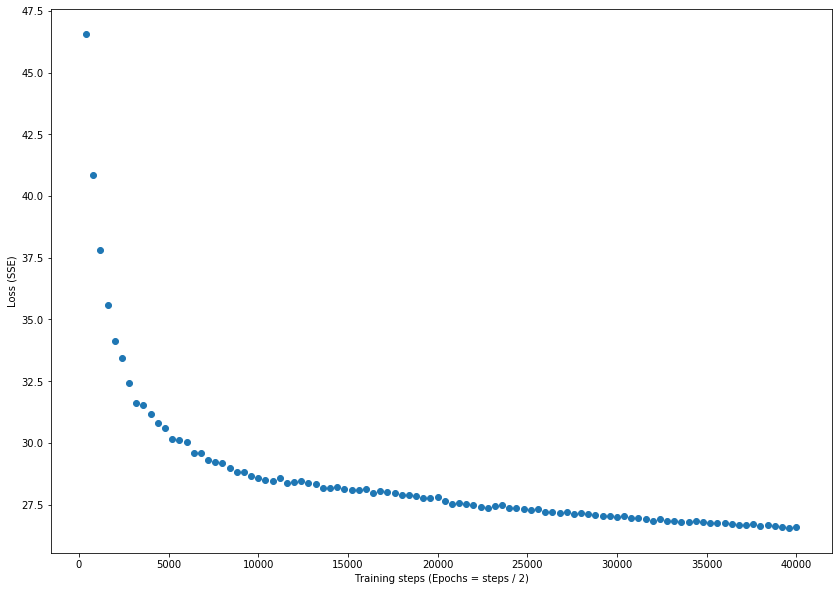

In [13]:
# Plotting the evaluations for each iteration as a function of training steps 
# to ensure that the model is not over-trained
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [14]:
# Calculating and storing the numpy array of predictions
pred = regressor.predict(input_fn=wx_input_fn(X_test, num_epochs=1, shuffle=False))

predictions = np.array([p['predictions'][0] for p in pred])

# Using the array of predictions to evaluate the prediction accuracy of the model
print("The Explained Variance: %.2f" % explained_variance_score(y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Farenheit" % mean_absolute_error(y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Farenheit" % median_absolute_error(y_test, predictions))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_model\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.87
The Mean Absolute Error: 3.61 degrees Farenheit
The Median Absolute Error: 2.59 degrees Farenheit
